<a href="https://colab.research.google.com/github/KodaiS/ML-study/blob/main/DensityEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Density Estimation](https://scikit-learn.org/stable/modules/density.html#density-estimation)
密度推定は、教師なし学習、特徴量エンジニアリング、データモデリングとの境界にある。最も一般的で有用な密度推定には、ガウシアンミクスチャー（GaussianMixture）のような混合モデルや、カーネル密度推定（KernelDensity）のような近傍ベースのアプローチがある。ガウシアンミクスチャーは、教師なしクラスタリング手法としても有用であるため、クラスタリングの文脈でより詳細に説明する。

密度推定は非常に単純な概念であり、多くの人が慣れ親しんだ一般的な密度推定手法はヒストグラムである。

## [Density Estimation: Histgrams](https://scikit-learn.org/stable/modules/density.html#density-estimation-histograms)
ヒストグラムは、ビンを定義し、各ビン内のデータ数を集計することで、データを簡単に可視化したものである。次の図の左上のパネルがヒストグラムの例である。
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_kde_1d_001.png)
ヒストグラムのメジャーな問題は、ビンの選び方が視覚化にバランスの悪い影響を与える可能性があることである。上図の右上のパネルでは、同じデータに対してビンを右にずらしてヒストグラムを表示したものである。二つの可視化の結果は全く異なったものに見え、異なったデータの解釈につながる可能性がある。

直感的には、ヒストグラムは1点につき1つのブロックを積み重ねたものだと考えることもできる。ブロックを適切なグリッド空間に積み重ねることで、ヒストグラムを復元することができる。しかし、ブロックを規則正しく積み上げるのではなく、各ブロックをその点の中心に置き、各位置での高さの合計を求めるとしたらどうだろう。このアイデアが、左下のビジュアライゼーションにつながる。ヒストグラムほどきれいではないが、データが直接的にブロックの位置を決定しているため、データをよりよく表現している。

この可視化はカーネル密度推定の例で、この場合はトップハットカーネル（つまり各点に正方形のブロックがある）を使っている。より滑らかなカーネルを使用することで、より滑らかな分布を復元することができる。右下のプロットはガウシアンカーネル密度推定を示し、各ポイントが全体でガウシアンカーブに寄与している。この結果、データから導かれた滑らかな密度推定値が得られ、データ点の分布の強力なノンパラメトリックモデルとして機能する。

## [Kernel Density Estimation](https://scikit-learn.org/stable/modules/density.html#kernel-density-estimation)

## [scikit-learn User Guide](https://scikit-learn.org/stable/modules/density.html#kernel-density)
scikit-learn のカーネル密度推定は [KernelDensity](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity) estimator で実装されており、効率的なクエリのために Ball Tree または KD Tree を使用する（これらの議論については [Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html#neighbors) を参照）。カーネル密度推定は任意の次元数で実行することができるが、実際には次元の呪いにより高次元で性能が低下する。
次の図では、二峰性分布から100点を抽出し、3種類のカーネルを選択した場合のカーネル密度推定値を示している。
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_kde_1d_003.png)
カーネルの形状が分布の滑らかさに影響を及ぼす。カーネル密度推定の実装は以下の通り。

In [ ]:
from sklearn.neighbors import KernelDensity
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(X)
kde.score_samples(X)

array([-0.41075698, -0.41075698, -0.41076071, -0.41075698, -0.41075698,
       -0.41076071])

ここで `kernel="gaussian"` を設定すると、カーネルは正関数 $K(x;h)$ となり、`bandwidth` パラメータ $h$ で制御される。このカーネルでは、点$x_i; i=1\cdots N$ における点 $y$ の密度推定を次の式で与える。

$$
\rho_K(y) = \sum_{i=1}^{N} K(y - x_i; h)
$$

[Wikipedia](https://ja.wikipedia.org/wiki/カーネル密度推定) では次の式で説明される。
$$
\hat{f}_h (x) = \frac{1}{nh} \sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)
$$

$x_i$は分布から得られたデータ点を表す。$K \left( \frac{x - x_i}{h} \right)$ は $x_i$ を中心とし、$h$ によって広がり方を調整された確率分布を与え、それを重ね合わせて全体の分布を推定する。

`bandwidth`は平滑化パラメータとして機能し、結果のバイアスと分散のトレードオフを制御する。bandwidthを大きくすると、重ね合わせる確率分布の一つ一つの幅が大きくなり、結果として非常に滑らかな（つまり高バイアス）密度分布になり、bandwidthを小さくすると、一つ一つの幅は狭くなり、結果として非平滑な（すなわち高バリアンスの）密度分布になる。  パラメータ`bandwidth`は、手動で設定するか、ScottとSilvermannの推定法を使用することができる。

[KernelDensity](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity)はいくつかの一般的なカーネル形式を実装している。次の図に示す。
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_kde_1d_002.png)

これらのカーネル形式は以下の通り。
- Gaussian kernel (`kernel="gaussian"`)
$K(x; h) \propto \exp(- \frac{x^2}{2h^2} )$

- Tophat kernel (`kernel="tophat"`)
$K(x; h) \propto 1$

- Epanechnikov kernel (`kernel="epanechnikov"`)
$K(x; h) \propto 1 - \frac{x^2}{h^2}$

- Exponential kernel (`kernel="exponential"`)
$K(x; h) \propto \exp(-x/h)$

- Linear kernel (`kernel="linear"`)
$K(x; h) \propto 1 - x/h$

- Cosine kernel (`kernel=",osine"`)
$K(x; h) \propto \cos(\frac{\pi x}{2h})$

カーネル密度推定器は、有効な距離メトリクス（利用可能なメトリクスの一覧は[DistanceMetric](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric)を参照）のいずれでも使用できるが、結果はユークリッドメトリクスのみで適切に正規化される。特に有用なメトリクスとして、球面上の点間の角度距離を測定する[Harversine distance](https://en.wikipedia.org/wiki/Haversine_formula)がある。ここでは、地理空間データの視覚化にカーネル密度推定を使用した例を示す。この例では、南米大陸における2つの異なる種の観測分布が示されている。
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_species_kde_001.png)
カーネル密度推定の他の有用な応用例として、データセットのノンパラメトリックな生成モデルを学習し、この生成モデルから新しいサンプルを効率的に抽出することがある。ここでは、データのPCAで得た主成分で学習したガウスカーネルを用いて、手書きの数字の新しいセットを作成するプロセスを示す。新しいデータは、入力データの線形結合で構成され、重みはKDEモデルから確率的に抽出される。

## [Generate digits images example](https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [ ]:
digits = load_digits()

In [ ]:
# PCAで圧縮
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# 生成モデルを学習
params = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)

GridSearchCV(estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])})

In [ ]:
print(f"best bandwidth: {grid.best_estimator_.bandwidth}")

best bandwidth: 3.79269019073225


In [ ]:
kde = grid.best_estimator_

In [ ]:
# 新しいデータを44個抽出し元の次元に復元する
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# プロットように整形
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

Text(0.5, 1.0, '"New" digits drawn from the kernel density model')

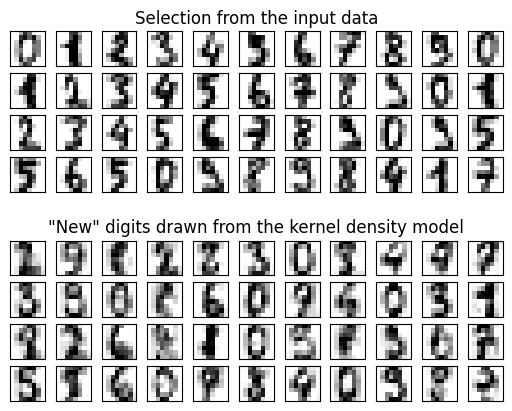

In [ ]:
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(
            real_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(
            new_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)

ax[0, 5].set_title("Selection from the input data")
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

## Supplement

###  [K-D Tree](https://scikit-learn.org/stable/modules/neighbors.html#k-d-tree)
ブルートフォースアプローチの計算効率の悪さに対処するために、様々なツリーベースのデータ構造が考案されてきた。一般に、これらの構造は、サンプルの集約的な距離情報を効率的に符号化することによって、必要な距離計算の回数を減らそうとするものである。基本的なアイデアは次の通り。ポイント $A$ がポイント $B$ から非常に遠く、ポイント $B$ とポイント $C$ が非常に近い場合、$A$ と $C$ は距離を計算せずとも非常に遠いことがわかる。このような方法で、最近傍法の計算コストを $O[D N \log(N)]$ またはそれ以上に削減することができる。これはブルートフォース法の $N$ よりも大幅に改善されている。

このように集約された情報を利用しようとする初期のアプローチが2次元のQuad-treeと3次元のOct-treeを任意の次元数に一般化したKD tree（K-dimensional treeの略）である。KDツリーは、パラメータ空間をデータ軸に沿って再帰的に分割し、データポイントがファイルされる入れ子の直交領域に分割するバイナリ木構造である。KDツリーの構築は、$D$次元の距離計算は不要で、データ軸に沿ってのみ分割が行われるため高速である。一旦構築されればクエリデータの最近傍は $O[\log(N)]$ の距離計算コストのみで決定することができる。KDツリーアプローチは20未満の低次元での近傍探索においては非常に高速だが、次元 $D$ が非常に大きい場合には非効率になってしまう。これは、いわゆる「次元の呪い」の一つの現れである。
scikit-learnでは、KDツリーの近傍探索はキーワード `algorithm="kd_tree"` で指定され、クラス [KDTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree) を使って計算される。

### [Ball Tree](https://scikit-learn.org/stable/modules/neighbors.html#ball-tree)
高次元におけるKDツリーの非効率性に対処するため、ボールツリーデータ構造が開発された。KDツリーがデカルト軸に沿ってデータを分割するのに対し、ボールツリーは一連の入れ子式超球でデータを分割する。このため、ツリーの構築はKDツリーよりもコストがかかるが、その結果、非常に高次元であっても、高度に構造化されたデータに対して非常に効率的なデータ構造となる。
ボールツリーは、データを重心 $C$ と半径 $r$ で定義されるノードに再帰的に分割し、ノード内の各点が $r$ と $C$ で定義される超球内に位置するようにする：

$$
|x+y| \leq |x| + |y|
$$

このセットアップでは、テスト点とセントロイド間の1回の距離計算で、ノード内の全ての点への距離の下界と上界を決定するのに十分である。ボールツリーノードは球面形状であるため、高次元ではKDツリーを上回る性能を発揮するが、実際の性能は学習データの構造に大きく依存する。scikit-learn では、ボールツリーベースの近傍探索は `algorithm="ball_tree"` というキーワードで指定され、 [BallTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree) クラスを使って計算される。あるいは、ユーザは [BallTree](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree) クラスを直接操作することもできる。